┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
Progress: 100%|█████████████████████████████████████████| Time: 0:01:21


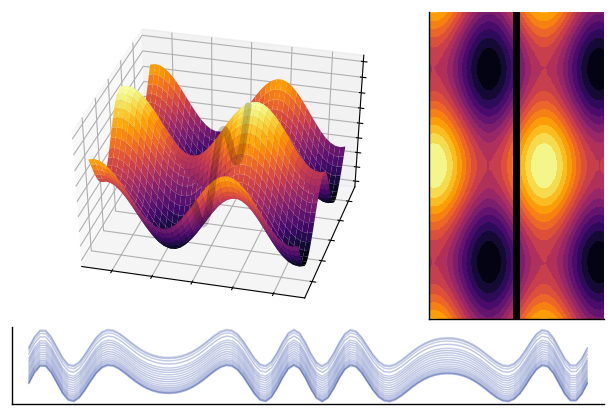

┌ Info: Saved animation to 
│   fn = /mnt/c/Users/kent/notebooks/julia/tmp.gif
└ @ Plots /home/kent/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/mnt/c/Users/kent/notebooks/julia/tmp.gif")

In [3]:
using Plots, ProgressMeter
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults
x = y = range(-5, stop = 5, length = 40)
zs = zeros(0,40)
n = 100

# create a progress bar for tracking the animation generation
prog = Progress(n,1)

@gif for i in range(0, stop = 2π, length = n)
    f(x,y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout=l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera=(15*cos(i), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)

    # increment the progress bar
    next!(prog)
end